In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
house_data = pd.read_csv('house.csv')
house_data = house_data[house_data['loyer']< 10000]
house_data.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


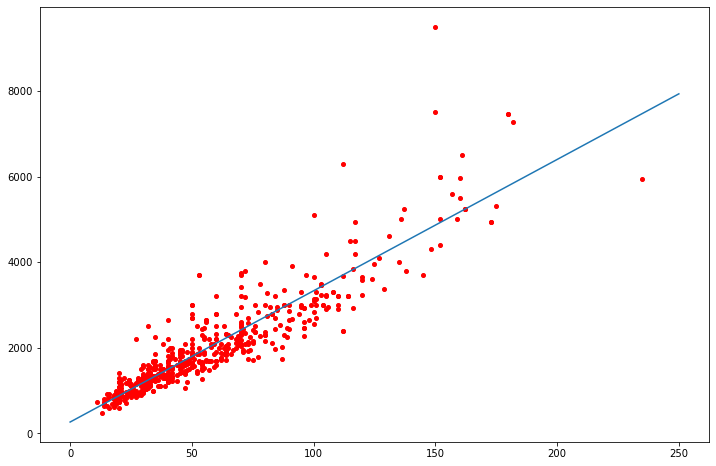

In [29]:
plt.figure(figsize=(12,8))
plt.plot(house_data['surface'], house_data['loyer'], 'ro',markersize=4)
plt.plot([0,250], [theta.item(0), theta.item(0) + 250 * theta.item(1)])
plt.show()

In [30]:
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface']]).T
y = np.matrix(house_data['loyer']).T

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

matrix([[266.45460292],
        [ 30.66119596]])

In [32]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)


LinearRegression()